<a href="https://colab.research.google.com/github/LaurensDergent/IP3/blob/main/Shapley_values_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Machine learning techniques are becoming increasingly popular, complex, powerful and accurate. However, these models are often "black boxes". It is often difficult to know how these models come to a prediction. Several techniques exist to explain the prediction of machine learning models. One popular technique, which will be used in this project, is SHAP (SHapley Additive exPlanations) values. SHAP values measure how much each feature contributes to the model's prediction. So SHAP values can help identify the most important features for the model and how they affect the outcome. This method comes from cooperative game theory.

TEST

# Discrete choice models

Different discrete choice models aim to maximise utility [1], allowing human decisions to be understand and predicted. Three commonly used models are the multinomial logit (MNL) model, the mixed logit model and the nested logit model.

The advantage of an MNL model is its closed mathematical formulation. This makes it relatively easy to estimate parameters and interpret results. A disadvantage of this model is that the model is based on the assumption of independence of irrelevant alternatives (IIA). However, this assumption is often unrealistic in reality, leading to biased predictions and inconsistent parameter estimates. To avoid this limitation, e.g. mixed logit and nested logit models exist.  

NOG VERDER SCHRIJVEN

# SHAP values in game theory

In a cooperative game, players have the opportunity to form coalitions. Depending on the coalition formed, a certain outcome can be achieved. SHAP values can provide a fair distribution of profits to the players.

This will first be explained by some simple examples [1]. Then, the general formula for calculating SHAP values in game theory will be explained. Finally, it is discussed why this is a fair distribution.

## Example

As an example, we will consider that players play a game together and achieve a certain score. The question is how can the score be attributed to each player?

In the first example, there are only two players. Then it will be explained how a fair attribution of the score can be done if there are multiple players.

### Example 2 players

Suppose the following scores are obtained:

* Coalition of player 1 and player 2: score of 100
* Only player 1: score of 80
* Only player 2: score of 60
* No players: score of 0

It is clear that player 1 contributed more to the total score, but how might the total contribution to the score now be distributed?

A way to have insight into the contribution of each player, is by calculating the expected marginal contribution of each player. To calculate the expected marginal contribution, the contribution of a player to all possible coalitions is considered. The expected marginal contribution of a player is than the weighted average of the players contribution to all the coalitions.


Player 1's marginal contribution for each possible coalition is as follows, with the notation C_x for the score of coalition x:

*   C_12 - C_2 = 100 - 60 = 40
*   C_1 - C_0 = 80 - 0 = 80

So, expected marginal contribution of Player 1: (40 + 80)/2 = 60


Player 2's marginal contribution (MC_2) is as follows:

*   C_12 - C_1 = 20
*   C_2 - C_0 = 60

So, expected marginal contribution of Player 2: (20 + 60)/2 = 40

Note that the sum of the expected marginal contribution of player 1 and player 2 are equal to the score when they form a coalition.

### Example multiple players

To make it more general, the case of multiple players will be considered. Suppose the following scores are obtained:

* Coalition of player 1, player 2 and player 3: score of 150
* Coalition of player 1 and player 2: score of 100
* Coalition of player 1 and player 3: score of 90
* Coalition of player 2 and player 3: score of 80
* Only player 1: score of 80
* Only player 2: score of 60
* Only player 3: score of 40
* No players: score of 0

How might the contribution to the score now be distributed?

Player 1's marginal contributions to the coalitions are as follow:

*   C_123 - C_23 = 70
*   C_12 - C_2 = 40
*   C_13 - C_3 = 50
*   C_1 - C_0 = 80

The weights are harder to determine with multiple players. The mathematical way is explained in the next subsection. A simple way is to do this using the graph of possible coalitions, as shown in the figure below for this example.

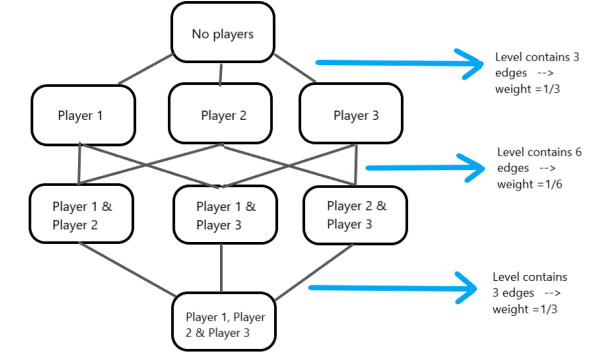

So player 1's expected marginal contribution: (1/3)*70 + (1/6)*40 + (1/6)*50 + (1/3)*80 = 65

Analogously, the expected marginal contribution of player 2 and player 3 can be determined. The expected marginal contribution of player 2 is 50 and of player 3 is 35.

## Formula

The expected marginal contribution are in fact the SHAP values. The generalised formula to compute the SHAP value for player m is as follow (taken from [2]):

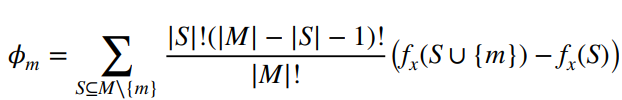

The summation is over all the coalitions S that are a subset of M without m, where M is the set of all the players. So S are all coalitions to which player m can make a marginal contribution. The marginal contribution of player m is the obtained value with that player m added to coalition S minus the obtained value to the coalition S.

The part in the formula with the division, is the weight for each marginal contribution. Each part can be seen in the formula for the weight as follow [3]:

*   |S|! : Number of ways players can join the coalition S, before player m joins
*   (|M| - |S| -1)! : Number of ways players can join the coalition S, after player m joins the coalition
* |M|! : Number of ways to form a coalition of M players





To extend this to machine learning, players can be seen as features and scores can be seen as the outcomes of the machine learning model.

## Fair distribution

These explained SHAP values are a fair distribution as they satisfy the four axioms that define a fair distribution [4]:

*  **Efficiency:** A distribution is efficient if the sum of the attributions equals the total result
* **Symmetry:** A distribution is symmetric if two or more attributes that have exactly the same contribution in all possible coalitions have equal attributions
*  **Additivity/Linearity:** A distribution is additive/linear if the attribution of a player in a game with two or more separate games, is the sum of the attributions in the separate games
*  **Dummy player:** A distribution deals correctly with a dummy player if a player who does not affect the game receives an attribution of zero



# SHAP values in Machine learning (theory)

To go from the game theory perspective to the Machine Learning (ML) perspective on Shapley values, an example about mode choice modelling is used. Mode choice modelling with ML has already been researched [5]. This information is used to explain our topic. The players become the features, a coalition becomes a set of feature values.

## Example Mode choice modelling

As an example, a mode choice model is used [5]. The results of the paper will be used to explain the use of SHAP values in a mobility case. To do this the model is simplified. The explanation method is based on the book "Interpretable Machine Learning:
A Guide for Making Black Box Models Explainable" [6]. The goal is to predict if a person chooses a car, public transport, bike or walking. The paper uses more features but for simplicity  the three most important features are used in this example, namely distance, cars and age.

For a certain person the model made the following prediction. The person wants to travel 80km, owns one car is 50 years old. The model predicted that a car would be chosen for this prediction. It's important to notice that our target variable is a categorical variable. In practice, this would be transformed into a numerical variable to make a prediction possible.

Table 1: Prediction for an instance \\
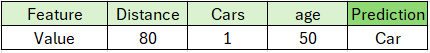


This can be linked with the game theory example. The game is to make a prediction. The players are the feature values and the scores are now the predictions.  \\
Next the shapley value of the feature "distance" is calculated. The coalition of 1 car and age 50 is fixed. Then instances with this coalition are randomly drawn. Based on the instances of Table 2, the contribution of distance can be quantified. By repeating this sampling an average of the contributions can be calculated. Finally, this is repeated for all coalitions.  \\
"The Shapley value is the average marginal contribution of a feature value across all possible coalitions." [6]





Table 2: Predictions for an instance with coalition of 1 car and an age of 50 year with a randomly drawn distance. \\


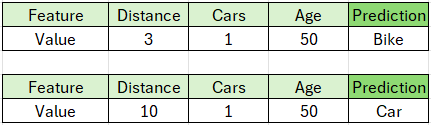

## Formula (hier nog wat uitbreiden)
The following part will dive deeper into how a Shapley value is calculated in ML.

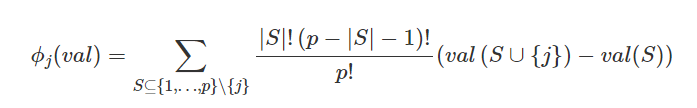

The formula is similar to the game theory formula. The variables have a different interpretation. S is a subset of the features used in the model.  

*   |S|! : Number of ways feature values can join the coalition S, before feature value j joins
*   (|p| - |S| - 1)! : Number of ways feature values can join the coalition S, after feature value j joins the coalition
* |p|! : Number of ways to form a coalition with p feature values.

*Val(S)*  is the prediction for feature values in set S that are marginalized over features that are not included in set S minus the average prediction over all instances. The second part of the formula will then give the marginal contribution of feature value *j* to a certain coalition S

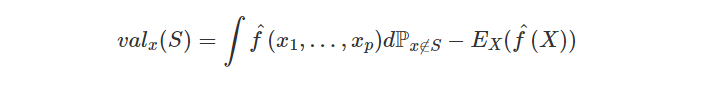

# Output
Shapley values give interpretability to black box models. SHAP gives us extra data to understand our models. However, it's important to use this data wisely by making usefull plots. The following section will give a few examples on how visualizing is an important part of Shapley.

The following figure comes from a mode choice modelling research [6]. It shows for a specific instance how much each feature value contributed to the prediction. Each prediction starts from a base value. Next up, each feature value has either a positive or a negative contribution to the prediction. The output is numerical. Based on the choice of transformation this can be retransformed into the categorical variable.

From Figure 1, it can be concluded that the distance of 5.8km has the biggest contribution to this prediction. Secondly the age of 78 also has a significant positive contribution. In this instance the person owns 4 bycicles and has higher education. These are the only feature values that have negative contribution.

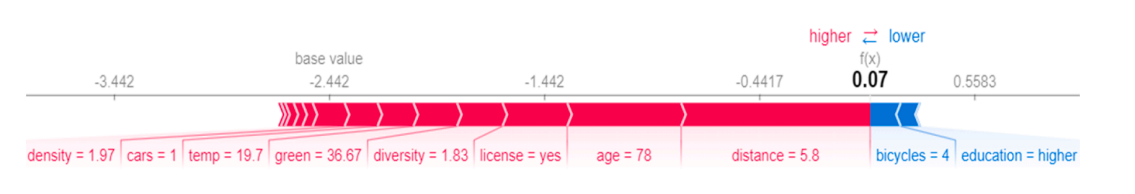

Figure 1: Illustration of SHAP on an instance

Figure 2 [7] gives a general view on how feature values impact all predictions. For every feature all feature values are shown: the color shows the relative value, the width of the line shows the distribution of the number of instances with such a feature value. For example, if a trip has a long trip length is will have most likely a negative shapley value and will negatively contribute to the prediction of the instance. It also shows that the dataset has a lot of instances with a short trip length with a Shapley value close to zero.

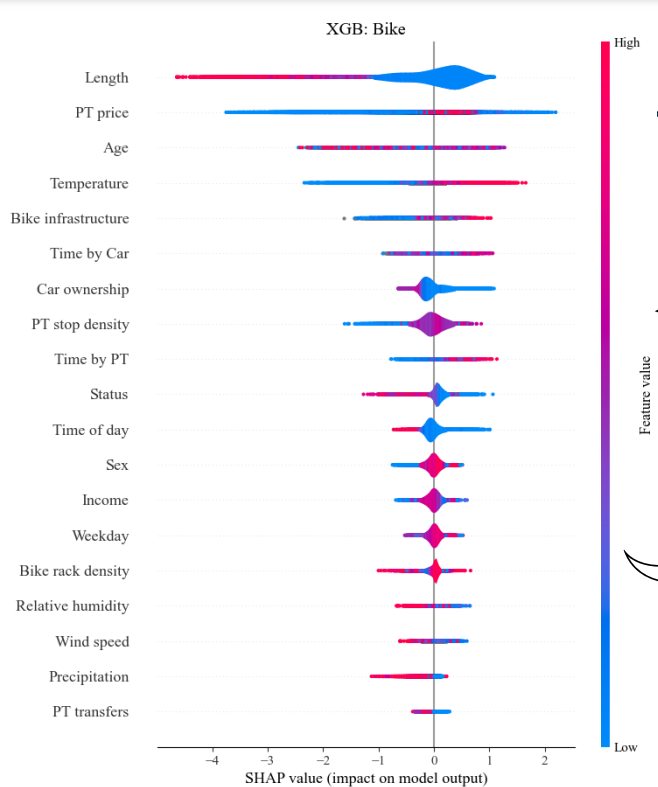

Figure 2: Impact of a feature on bike predictions

## Limitations of SHAP

### SHAP package

### Feature dependecies

### Causal inference

### Human error

## (Different SHAP calculation methods)



*   KernelSHAP
*   TreeSHAP
*   DeepSHAP




# SHAP values in practical case (what can/will we do with it in the future?)

# Alternatives and differences: Lime (zie ppt)

# Uitsmijter

An intuitive way to understand the Shapley value is the following illustration: The feature values enter a room in random order. All feature values in the room participate in the game (= contribute to the prediction). The Shapley value of a feature value is the average change in the prediction that the coalition already in the room receives when the feature value joins them.

# Bibliography

[1] Kashifi, M. T., Jamal, A., Kashefi, M. S., Almoshaogeh, M., & Rahman, S. M. (2022). Predicting the travel mode choice with interpretable machine learning techniques: A comparative study. Travel Behaviour and Society, 29, 279-296.

[1] Roth, A. E. (1988). Introduction to the Shapley value. The Shapley value, 1-27.

[2] Ignatov, D. I., & Kwuida, L. (2022). On Shapley value interpretability in concept-based learning with formal concept analysis. Annals of Mathematics and Artificial Intelligence, 90(11-12), 1197-1222.

[3] O’Sullivan, C. (2023, March 12). From Shapley to SHAP — Understanding the Math - Towards Data Science. Medium. Retrieved February 29, 2024, from https://towardsdatascience.com/from-shapley-to-shap-understanding-the-math-e7155414213b

[4] Li, M., Sun, H., Huang, Y., & Chen, H. (2024). Shapley value: from cooperative game to explainable artificial intelligence. Autonomous Intelligent Systems, 4(1), 1-12.

[5] Kashifi, Mohammad Tamim & Jamal, Arshad & Kashefi, Mohammad Samim & Almoshaogeh, Meshal & Rahman, Syed Masiur. (2022). Predicting the travel mode choice with interpretable machine learning techniques: A comparative study. Travel Behaviour and Society. 29. 10.1016/j.tbs.2022.07.003.

[6] Christoph Molnar, (2023, August 21), Interpretable Machine Learning:
A Guide for Making Black Box Models Explainable, https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value

[7] Dahmen, Victoria & Weikl, Simone & Bogenberger, Klaus. (2023). Interpretable Machine Learning for Mode Choice Modeling on Tracking-Based Revealed Preference Data. 10.13140/RG.2.2.33088.92166/1.